In [534]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading & Understanding the Data

In [535]:
df = pd.read_csv('../data/raw/AmesHousing.csv')
print(f"Dataset shape: {df.shape}")

Dataset shape: (2930, 82)


In [536]:
df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Basic Information

In [537]:
print("list of column names:", df.columns.to_list())
print("\ndata types:\n", df.dtypes)

list of column names: ['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Pav

Total number of rows and columns

In [538]:
print("total number of rows ", df.shape[0])
print("total number of columns ", df.shape[1])

total number of rows  2930
total number of columns  82


In [539]:
# null check for missing values
df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

Summarize the data

In [540]:
df.describe(include='all')

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930,2440.000000,2930.000000,2930,198,2930,2930,...,2930.000000,13,572,106,2930.000000,2930.000000,2930.000000,2930,2930,2930.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,...,NaN,4,4,5,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,...,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,NaN,2273,NaN,NaN,2918,120,1859,2633,...,NaN,4,330,95,NaN,NaN,NaN,2536,2413,NaN
mean,1465.50000,7.144645e+08,57.387372,NaN,69.224590,10147.921843,NaN,NaN,NaN,NaN,...,2.243345,NaN,NaN,NaN,50.635154,6.216041,2007.790444,NaN,NaN,180796.060068
std,845.96247,1.887308e+08,42.638025,NaN,23.365335,7880.017759,NaN,NaN,NaN,NaN,...,35.597181,NaN,NaN,NaN,566.344288,2.714492,1.316613,NaN,NaN,79886.692357
min,1.00000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,12789.000000
25%,733.25000,5.284770e+08,20.000000,NaN,58.000000,7440.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN,129500.000000
50%,1465.50000,5.354536e+08,50.000000,NaN,68.000000,9436.500000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,160000.000000
75%,2197.75000,9.071811e+08,70.000000,NaN,80.000000,11555.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,213500.000000


Identifying the categorical and numerical data

In [541]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"\nNumerical columns ({len(numerical_columns)}): {numerical_columns}")


Categorical columns (43): ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']

Numerical columns (39): ['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Be

Target Value Analysis

In [542]:
# checking for target variable
df['SalePrice'].describe()


count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Data Cleaning

# Imputing & understanding missing values in columns

In [543]:
print("Total number of missing values in the dataset", df.isnull().sum().sum())
print("ascensing order of missing values in each column:\n", df.isnull().sum().sort_values(ascending=False))
print("Number of columns with no missing values:", df.isnull().sum().value_counts().get(0, 0))

# finding the top 10 columns with largest missing values
top_10_missing = df.isnull().sum().nlargest(10)
print("\nTop 10 columns with the most missing values:\n", top_10_missing)

Total number of missing values in the dataset 15749
ascensing order of missing values in each column:
 Pool QC         2917
Misc Feature    2824
Alley           2732
Fence           2358
Mas Vnr Type    1775
                ... 
PID                0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 82, dtype: int64
Number of columns with no missing values: 55

Top 10 columns with the most missing values:
 Pool QC          2917
Misc Feature     2824
Alley            2732
Fence            2358
Mas Vnr Type     1775
Fireplace Qu     1422
Lot Frontage      490
Garage Yr Blt     159
Garage Finish     159
Garage Qual       159
dtype: int64


# Inference for missing values 
Pool QC 99.556314
Misc Feature 96.382253
Alley 93.242321
Fence 80.477816
Mas Vnr Type 60.580205
These are too much missing values (>>60%) and if we impute them then , Imputation becomes unreliable because there’s too little real data

In [544]:
# Step 1: COMPREHENSIVE MISSING DATA ANALYSIS FOR ALL 82 COLUMNS
print("="*100)
print("COMPREHENSIVE MISSING DATA ANALYSIS - ALL COLUMNS")
print("="*100)

# Calculate missing percentages for all columns
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df)) * 100,
    'Data_Type': df.dtypes.values
})

# Sort by missing percentage
missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)

# Categorize columns by missing percentage
missing_data['Category'] = pd.cut(missing_data['Missing_Percentage'], 
                                  bins=[0, 5, 30, 60, 100],
                                  labels=['Keep (< 5%)', 'Impute (5-30%)', 'Investigate (30-60%)', 'High Risk (> 60%)'])

print("\n📊 SUMMARY OF MISSING DATA DISTRIBUTION:")
print("-" * 100)
print(f"Total columns: {len(df.columns)}")
print(f"Columns with NO missing data: {(missing_data['Missing_Percentage'] == 0).sum()}")
print(f"Columns with < 5% missing: {(missing_data['Missing_Percentage'] < 5).sum()}")
print(f"Columns with 5-30% missing: {((missing_data['Missing_Percentage'] >= 5) & (missing_data['Missing_Percentage'] < 30)).sum()}")
print(f"Columns with 30-60% missing: {((missing_data['Missing_Percentage'] >= 30) & (missing_data['Missing_Percentage'] < 60)).sum()}")
print(f"Columns with > 60% missing: {(missing_data['Missing_Percentage'] > 60).sum()}")

print("\n\n🔴 HIGH-RISK COLUMNS (> 60% MISSING) - DECISION REQUIRED:")
print("-" * 100)
high_risk = missing_data[missing_data['Missing_Percentage'] > 60]
print(high_risk.to_string())

print("\n\n🟡 BORDERLINE COLUMNS (30-60% MISSING) - INVESTIGATE FIRST:")
print("-" * 100)
borderline = missing_data[(missing_data['Missing_Percentage'] >= 30) & (missing_data['Missing_Percentage'] < 60)]
print(borderline.to_string())

print("\n\n🟢 GOOD COLUMNS (< 30% MISSING) - SAFE TO IMPUTE:")
print("-" * 100)
safe = missing_data[missing_data['Missing_Percentage'] < 30]
print(f"Count: {len(safe)} columns")
print(safe[['Column', 'Missing_Count', 'Missing_Percentage', 'Data_Type']].head(15).to_string())

COMPREHENSIVE MISSING DATA ANALYSIS - ALL COLUMNS

📊 SUMMARY OF MISSING DATA DISTRIBUTION:
----------------------------------------------------------------------------------------------------
Total columns: 82
Columns with NO missing data: 55
Columns with < 5% missing: 70
Columns with 5-30% missing: 6
Columns with 30-60% missing: 1
Columns with > 60% missing: 5


🔴 HIGH-RISK COLUMNS (> 60% MISSING) - DECISION REQUIRED:
----------------------------------------------------------------------------------------------------
          Column  Missing_Count  Missing_Percentage Data_Type           Category
73       Pool QC           2917           99.556314    object  High Risk (> 60%)
75  Misc Feature           2824           96.382253    object  High Risk (> 60%)
7          Alley           2732           93.242321    object  High Risk (> 60%)
74         Fence           2358           80.477816    object  High Risk (> 60%)
26  Mas Vnr Type           1775           60.580205    object  High Ris

1. Dropping columns with missing values > 60% that are random missing values
2. Dropping columns that are near constant - having same value for all the rows

In [545]:
df.head(20)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [546]:
# checking for categorical columns with near constant values
for col in categorical_cols:
    value_count = df[col].value_counts(normalize=True)
    top_col_values = value_count.iloc[0]
    print(col,"------->", top_col_values)

MS Zoning -------> 0.7757679180887372
Street -------> 0.9959044368600682
Alley -------> 0.6060606060606061
Lot Shape -------> 0.6344709897610922
Land Contour -------> 0.8986348122866894
Utilities -------> 0.9989761092150171
Lot Config -------> 0.7303754266211604
Land Slope -------> 0.951877133105802
Neighborhood -------> 0.15119453924914675
Condition 1 -------> 0.8607508532423208
Condition 2 -------> 0.9897610921501706
Bldg Type -------> 0.8276450511945392
House Style -------> 0.5054607508532423
Roof Style -------> 0.7921501706484642
Roof Matl -------> 0.9853242320819112
Exterior 1st -------> 0.35017064846416385
Exterior 2nd -------> 0.3464163822525597
Mas Vnr Type -------> 0.7619047619047619
Exter Qual -------> 0.6139931740614335
Exter Cond -------> 0.8699658703071672
Foundation -------> 0.447098976109215
Bsmt Qual -------> 0.45017543859649123
Bsmt Cond -------> 0.9178947368421052
Bsmt Exposure -------> 0.6694766420793818
BsmtFin Type 1 -------> 0.30140350877192984
BsmtFin Type 2 ----

# inference from the list of near constants 
Street	---> 0.996 ---->	 No variance
Utilities ---->	0.999 ---->	 Almost all same
Condition 2	----> 0.989	---> Rare secondary condition
Roof Matl	-----> 0.985 ---> Almost always same
Heating	---> 0.984	--> Almost always GasA

These fail all 3 rules → we can DROP.

In [547]:
# target variable relation with categorical columns
for col in categorical_cols:
    target_relation_data = df.groupby(col)['SalePrice'].median()
    print(f"\nMedian SalePrice by {col}:\n", target_relation_data)


Median SalePrice by MS Zoning:
 MS Zoning
A (agr)     47300.0
C (all)     78000.0
FV         209000.0
I (all)     80312.5
RH         140000.0
RL         172000.0
RM         120750.0
Name: SalePrice, dtype: float64

Median SalePrice by Street:
 Street
Grvl     87425.0
Pave    160375.0
Name: SalePrice, dtype: float64

Median SalePrice by Alley:
 Alley
Grvl    121000.0
Pave    172700.0
Name: SalePrice, dtype: float64

Median SalePrice by Lot Shape:
 Lot Shape
IR1    190000.0
IR2    213000.0
IR3    213000.0
Reg    145000.0
Name: SalePrice, dtype: float64

Median SalePrice by Land Contour:
 Land Contour
Bnk    136500.0
HLS    232606.5
Low    187750.0
Lvl    160000.0
Name: SalePrice, dtype: float64

Median SalePrice by Utilities:
 Utilities
AllPub    160000.0
NoSeWa    137500.0
NoSewr     86312.5
Name: SalePrice, dtype: float64

Median SalePrice by Lot Config:
 Lot Config
Corner     160000.0
CulDSac    206750.0
FR2        160500.0
FR3        184450.0
Inside     158000.0
Name: SalePrice, dty

# inference - after target relationship with categorical column 
Based on output:
    MS Zoning
    Neighborhood (VERY strong)
    Exter Qual / Kitchen Qual / Bsmt Qual
    Central Air
    Garage Finish / Type
    Sale Condition
    Sale Type
    Fireplace Qu

These are very important columns that we affect the target column.
Near-constant categorical features are retained because meaningful target separation was observed.

# Overall summary of eda for categorical columns 
1. Columns to DROP (definitive)
    These have >60% missing values and are structurally sparse:
        Pool QC (~99.5% missing)
        Misc Feature (~96% missing)
        Alley (~93% missing)
        Fence (~80% missing)
        Mas Vnr Type (~60.6% missing)
    Reason - 
        Missingness is too high to impute meaningfully
        Sparse presence introduces noise
        Sample size is unreliable
2. We keep other columns even if they are near constant columns like 
            Street
            Utilities etc
        Reason - 
            Near-constant columns still have meaningful target separation
            The SalePrice(target column) has differnec in median value for the different categories present in these columns, so we don't drop them.


In [548]:
# dropping the columns
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum()/ len(df)) *100
print(missing_percentage[missing_percentage > 60])
# Filter columns with missing values > 60%
cols_missing_above_60 = missing_percentage[missing_percentage > 60].sort_values(ascending=False)
print("\nColumns with more than 60% missing values:\n", cols_missing_above_60)
cols_to_drop = cols_missing_above_60.index.tolist()
df.drop(columns=cols_to_drop, inplace=True)

Alley           93.242321
Mas Vnr Type    60.580205
Pool QC         99.556314
Fence           80.477816
Misc Feature    96.382253
dtype: float64

Columns with more than 60% missing values:
 Pool QC         99.556314
Misc Feature    96.382253
Alley           93.242321
Fence           80.477816
Mas Vnr Type    60.580205
dtype: float64


# EDA for Numeric columns
1. Separating numeric columns
2. Identifying near-constant numeric features - check variance 
    Variance is used only for numeric columns
3. Identifying “mostly zero” columns

In [549]:
numeric_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()
print("Numeric columns:", len(numeric_columns))


Numeric columns: 39


In [550]:
# identifying near-constant numeric features 
numeric_variance = df[numeric_columns].var().sort_values()
numeric_variance.head(20)

Kitchen AbvGr        0.045829
Bsmt Half Bath       0.060149
Half Bath            0.252636
Bsmt Full Bath       0.275436
Full Bath            0.305743
Fireplaces           0.419802
Garage Cars          0.578461
Bedroom AbvGr        0.685139
Overall Cond         1.235514
Yr Sold              1.733470
Overall Qual         1.990995
TotRms AbvGrd        2.474217
Mo Sold              7.368469
Year Remod/Add     435.151527
Lot Frontage       545.938878
3Ssn Porch         632.086526
Garage Yr Blt      651.699781
Year Built         914.781840
Pool Area         1267.159268
MS SubClass       1818.001138
dtype: float64

In [551]:
# identifying "mostly zero" columns
zero_ratio = (df[numeric_columns]== 0).mean().sort_values(ascending=False)
zero_ratio.head(20)

Pool Area          0.995563
3Ssn Porch         0.987372
Low Qual Fin SF    0.986348
Misc Val           0.964846
Bsmt Half Bath     0.939590
Screen Porch       0.912628
BsmtFin SF 2       0.879863
Enclosed Porch     0.843345
Half Bath          0.629010
Mas Vnr Area       0.596587
Bsmt Full Bath     0.582594
2nd Flr SF         0.572696
Wood Deck SF       0.520819
Fireplaces         0.485324
Open Porch SF      0.443686
BsmtFin SF 1       0.317406
Bsmt Unf SF        0.083276
Garage Area        0.053584
Garage Cars        0.053584
Total Bsmt SF      0.026962
dtype: float64

In [552]:
# numeric statistical summary
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


# inferences for numeric data 
1. Low variance 
    Examples:
        Kitchen AbvGr (variance ≈ 0.04)
        Bsmt Half Bath (variance ≈ 0.06)
    These are count features, not noise.
    They still affect price → we keep it
2. Mostly-zero columns
        Pool Area → 99.5% zeros
        3Ssn Porch, Low Qual Fin SF, Misc Val
    These are rare but high-impact features ---> we keep it, affect the target price
3. Numeric cols to drop - ['Order', 'PID']
        Beacuse these are identifiers with no predictive meaning for the model

In [553]:
# droping the identified columns for numeric features
df.drop(columns=['Order', 'PID'], inplace=True)
df.head(10)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
5,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,195500
6,120,RL,41.0,4920,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,170,0,0,0,0,4,2010,WD,Normal,213500
7,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,144,0,0,1,2010,WD,Normal,191500
8,120,RL,39.0,5389,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,236500
9,60,RL,60.0,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,189000


# Target vs Numeric Relationship + Outliers

1. Correlation with target (ONLY numeric)

In [554]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_columns

['MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']

In [555]:
# corelation with target variable
corr_with_target = df[numerical_columns].corr()['SalePrice'].sort_values(ascending=False)
corr_with_target

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

# inference 
|corr| ≥ 0.6 → very strong signal
0.4 – 0.6 → strong / useful
0.2 – 0.4 → moderate
< 0.2 → weak (not useless, but low priority)

1. Top predictors - these will dominate linear models, tree models
Overall Qual        0.799
Gr Liv Area         0.707
Garage Cars         0.648
Garage Area         0.640
Total Bsmt SF       0.632
1st Flr SF          0.622
Year Built          0.558
Full Bath           0.546
Year Remod/Add      0.533
Garage Yr Blt       0.527
Mas Vnr Area        0.508
2. These two are highly correlated with each other → multicollinearity risk.
Garage Cars   0.647
Garage Area   0.640

# Imputing missing values

## Imputing numerical columns

1. Numeric features where NaN = absence → fill with 0
2. Numeric features where NaN = missing measurement → median

In [556]:
zero_fill_cols = [
    'Mas Vnr Area',
    'BsmtFin SF 1',
    'BsmtFin SF 2',
    'Bsmt Unf SF',
    'Total Bsmt SF',
    'Bsmt Full Bath',
    'Bsmt Half Bath',
    'Garage Cars',
    'Garage Area',
    'Pool Area',
    'Misc Val'
]
df[zero_fill_cols] = df[zero_fill_cols].fillna(0)

df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].median())
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Garage Yr Blt'].median())

In [557]:
# verifying missing values after imputation for numerical columns
df[numerical_columns].isnull().sum()

MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
SalePrice          0
dtype: int64

## Imputing categorical columns
1. computing columns that are missing because the feature does not exist - filling it with NONE
2. Missing that are random, not structural - 

In [558]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", len(categorical_cols))

Categorical columns: 38


In [559]:
# filling none for categorical columns where missing means absence of the feature
none_fill_cols = [
    'Bsmt Qual','Bsmt Cond','Bsmt Exposure',
    'BsmtFin Type 1','BsmtFin Type 2',
    'Fireplace Qu',
    'Garage Type','Garage Finish','Garage Qual','Garage Cond'
]
df[none_fill_cols] = df[none_fill_cols].fillna('NONE')

In [560]:
# filling remaining categorical columns with mode
remaining_categorical_cols = [col for col in categorical_cols if col not in none_fill_cols]
for col in remaining_categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [561]:
df[categorical_cols].isnull().sum()

MS Zoning         0
Street            0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Heating           0
Heating QC        0
Central Air       0
Electrical        0
Kitchen Qual      0
Functional        0
Fireplace Qu      0
Garage Type       0
Garage Finish     0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Sale Type         0
Sale Condition    0
dtype: int64

In [562]:
df.isnull().sum().sum()

np.int64(0)

Now the Whole dataset is completely populated with 0 missing values

Checking target skewness and Distribution of Sale Price

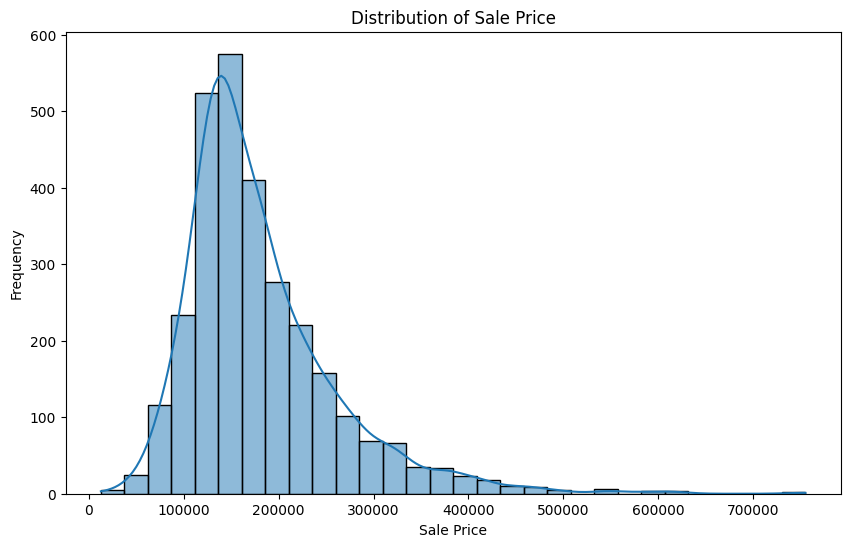

In [563]:
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [564]:
# checking skewness
df['SalePrice'].skew()

np.float64(1.7435000757376466)

# inference for target variable
1. sale price columns is the target variable
2. The skew of target variable is 1.743 - highly skewed data
3. the graph is right skewed - need to add log transform to make the distribution normal
4. outliers exists long tail towards the left - some houses have extreme high prices
5. mean of the prices is approx $180k

# Reducing the skeweness using log transform 

In [565]:
# applying log transform to reduce skewness
df['SalePrice_log'] = np.log1p(df['SalePrice'])  # log(1 + x) to avoid log(0)


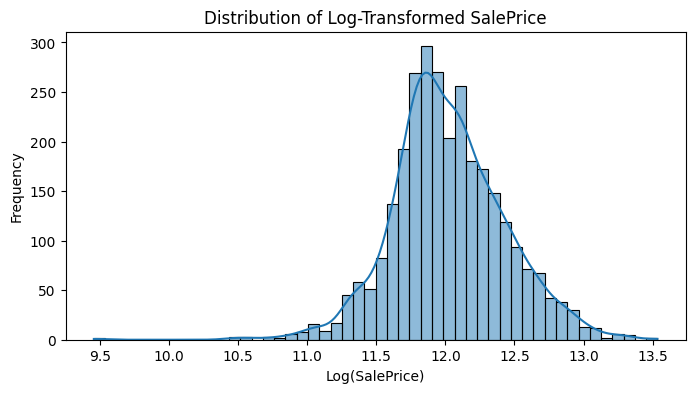

In [566]:
# plotting the distribution after log transform
plt.figure(figsize=(8,4))
sns.histplot(df['SalePrice_log'], kde=True, bins=50)
plt.title('Distribution of Log-Transformed SalePrice')
plt.xlabel('Log(SalePrice)')
plt.ylabel('Frequency')
plt.show()


In [567]:
# checking skewness after log transform
df['SalePrice_log'].skew()

np.float64(-0.014772659537224382)

## Inference for skeweness on target variable 
- The target variable was highly right-skewed (skew ≈ 1.74)
so I applied a log transformation, which reduced skewness to ≈ -0.19 and stabilized variance for linear models.

# Correlation of SalePrice with Other Features

## Correlation of SalePrice with Numeric Features

In [568]:
# recreating numeric  and categorical columns list after x and y separation
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()


#  remove target variable from numeric columns to avoid data leakage
numeric_cols = [col for col in numeric_cols if col!='SalePrice' and col!='SalePrice_log']

'SalePrice_log' in numeric_cols 

False

In [569]:
target_corr_numeric = df[numeric_cols].corrwith(y).sort_values(ascending=False)
target_corr_numeric

Overall Qual       0.822910
Gr Liv Area        0.690664
Garage Cars        0.672015
Garage Area        0.646811
Total Bsmt SF      0.621509
Year Built         0.615384
1st Flr SF         0.597492
Year Remod/Add     0.586066
Full Bath          0.575336
Garage Yr Blt      0.538684
TotRms AbvGrd      0.489515
Fireplaces         0.486417
Mas Vnr Area       0.435916
BsmtFin SF 1       0.407353
Wood Deck SF       0.331628
Lot Frontage       0.327093
Open Porch SF      0.317696
Half Bath          0.305500
Bsmt Full Bath     0.273445
2nd Flr SF         0.273260
Lot Area           0.252275
Bsmt Unf SF        0.193712
Bedroom AbvGr      0.182912
Screen Porch       0.109847
Pool Area          0.053418
3Ssn Porch         0.040546
Mo Sold            0.038903
BsmtFin SF 2       0.019728
Misc Val          -0.008155
Bsmt Half Bath    -0.019113
Yr Sold           -0.033484
Overall Cond      -0.041934
Low Qual Fin SF   -0.044874
MS SubClass       -0.068744
Kitchen AbvGr     -0.127617
Enclosed Porch    -0

/var/folders/0j/xm__613x13l7smp4fldvtq240000gn/T/ipykernel_8801/1386167028.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bottom_numeric_features.values, y=top_bottom_numeric_features.index, palette='coolwarm')


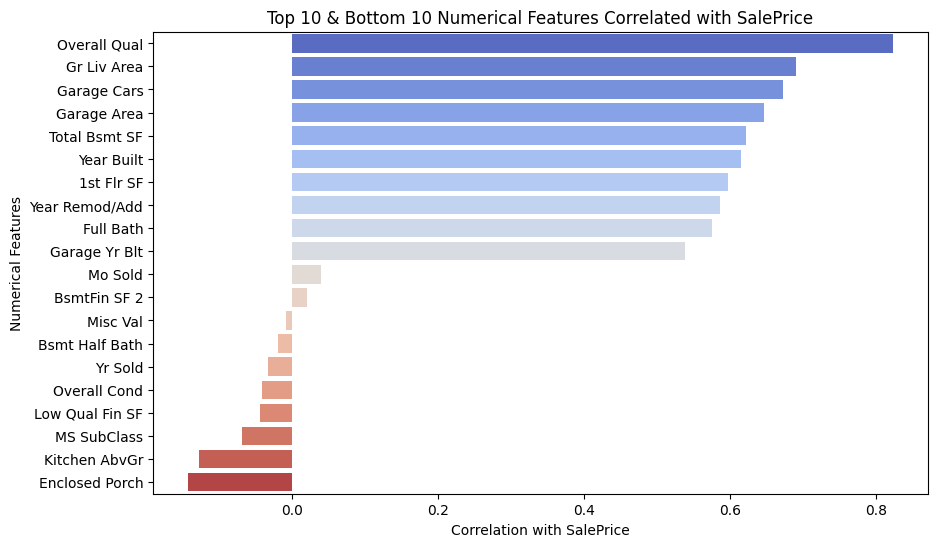

In [570]:
# understanding the distribution for numerical  features
# for numerical columns ---> picking top 10 correlated features with target variable and bottom 10 negatively correlated features
top_10_numeric_corr = target_corr_numeric.sort_values(ascending=False).head(10)
botthom_10_numeric_corr = target_corr_numeric.sort_values(ascending=False).tail(10)
top_bottom_numeric_features = pd.concat([top_10_numeric_corr, botthom_10_numeric_corr])

# plotting the top 10 & bottom 10 correlated numerical features
plt.figure(figsize=(10,6))
sns.barplot(x=top_bottom_numeric_features.values, y=top_bottom_numeric_features.index, palette='coolwarm')
plt.title('Top 10 & Bottom 10 Numerical Features Correlated with SalePrice')
plt.xlabel('Correlation with SalePrice')
plt.ylabel('Numerical Features')
plt.show()

# inference for the numerical columns correlation with y 
- The features most positively correlated with SalePrice are Overall Qual, Gr Liv Area, Garage Cars, Garage Area, and Total Bsmt SF, indicating that higher values in these features are strongly associated with higher house prices.

- Year Built, 1st Flr SF, Full Bath, and Garage Yr Blt also show moderate positive correlation with SalePrice.

- Some features, like Enclosed Porch, Kitchen AbvGr, Overall Cond, and MS SubClass, have weak or negative correlations, suggesting little to no direct impact on the sale price.

- Overall, house quality, size, and garage capacity are the strongest predictors of sale price in this dataset.



# Correlation of target with categorical columns
- For Categorical features do NOT use Pearson correlation
So we never do .corr() for categorical columns. 
- Instaed we use statis tical proxies that ask -
"Does this categorical feature meaningfully change SalePrice?"
"Does changing the category change the SalePrice meaningfully?

- ranking metric for categorical importance 
Higher std → category strongly impacts price
Near 0 std → not important categorical feature

In [571]:
categorical_target_corr = {}
for col in categorical_columns:
    categorical_target_corr[col] = (
        # Creates a temporary table: columns | SalePrice_log
        pd.concat([df[col], df['SalePrice_log']], axis=1)
        # Groups by the categorical column and calculates the standard deviation of the median SalePrice_log
        .groupby(col)['SalePrice_log']
        # Calculates the median SalePrice_log for each category
        .median()
        # Calculates the standard deviation of these median values
        .std()  
    )

categorical_target_corr_series = pd.Series(categorical_target_corr).sort_values(ascending=False)
categorical_target_corr_series.head(10)

Exter Qual      0.629860
MS Zoning       0.627519
Functional      0.604015
Condition 2     0.537802
Bsmt Qual       0.497895
Kitchen Qual    0.473450
Street          0.430936
Garage Qual     0.383744
Central Air     0.371921
Electrical      0.364750
dtype: float64

/var/folders/0j/xm__613x13l7smp4fldvtq240000gn/T/ipykernel_8801/251702561.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cat_feature.values, y=top_10_cat_feature.index, palette='coolwarm')


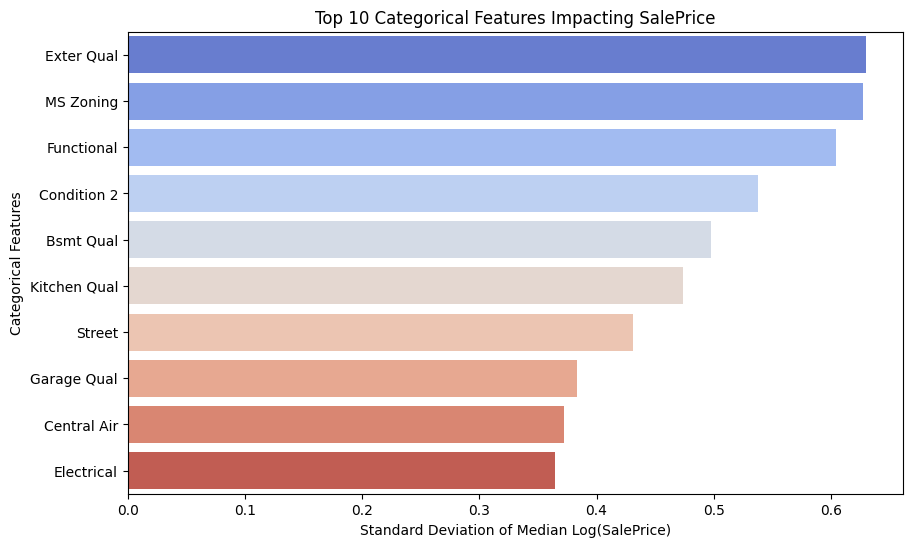

In [572]:
top_10_cat_feature = categorical_target_corr_series.head(10)
# plotting the top 10 categorical features
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_cat_feature.values, y=top_10_cat_feature.index, palette='coolwarm')
plt.title('Top 10 Categorical Features Impacting SalePrice')
plt.xlabel('Standard Deviation of Median Log(SalePrice)')
plt.ylabel('Categorical Features')
plt.show()

# inference for impact of categorical columns on target column
1. Interpreting the Top Features (using your list)

Let’s take the top ones:

- MS Zoning → 0.052

Zoning categories (RL, RM, FV…) have very different price bands

This is a strong structural feature

Must be kept

Encode carefully (One-Hot or Target Encoding)

- Functional → 0.050

Home usability (Typ, Sev, Maj…) strongly impacts price

Logical: bad functionality → lower price

Very predictive

- Exter Qual / Kitchen Qual / Bsmt Qual

These are quality indicators

Houses with “Excellent” vs “Fair” show large price jumps

These are ordinal features

Should be ordinal-encoded, not one-hot

- Condition 2

Secondary location condition

Rare categories but very price-sensitive

Keep, but watch for sparsity

Street → 0.034

Even though near-constant, price difference between Pave vs Gravel is significant

This proves an important lesson:

Evaluating categorical feature importance by measuring how much the median target value varies across categories. Features like MS Zoning, Functional, and Quality-related variables showed the strongest separation and were prioritized for modeling.

# Duplicates Check 

In [573]:
# checking for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f'Total number of duplicate rows: {duplicate_rows}')

Total number of duplicate rows: 0


No duplicates found

# Outliers check for numerical columns 
There are 2 methods to fix outliers in df before model training. 
1. Outlier Caping using IQR - applied to continuous variables with heavy-tailed distributions.
2. Using ZScore 

I will use outlier capping using IQR here to handler outilers beacuse - 
1. after zero-ratio analysis most rows are 0's & few rows have large values creating spikes & long tails
2. the columns have high skewness + extreme max values 
Several continuous features exhibit strong skewness combined with extreme upper values, which can disproportionately influence linear and distance-based models.
3. The numeric fetaures for house price prediction does have extreme values (outliers) in real life so we don't remove those row values, 
instead cap then to the upper bound using IQR formula.
Hence, order and relatipnship of the feture will be preserved and extreme price spikes will be reduced.
4. Model robustness
Linear models are highly sensitive to large magnitudes; capping stabilizes training and improves generalization.
5. I am capping the continuous features that are:
Highly skewed
Have rare extreme values
Represent size / area / money
Dominate linear models

I did not use zscore as the data is -
1. The data is heavily skewed and not normally distributed
2. Z-score assumptions break down in long-tailed distributions


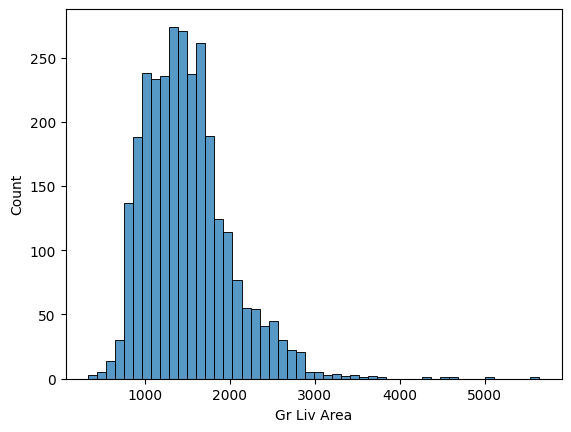

In [574]:
sns.histplot(df['Gr Liv Area'], bins=50)
plt.show()


In [575]:
outlier_cols = [
    'Lot Area',
    'Lot Frontage',
    'Mas Vnr Area',
    'BsmtFin SF 1',
    'BsmtFin SF 2',
    'Total Bsmt SF',
    '1st Flr SF',
    '2nd Flr SF',
    'Gr Liv Area',
    'Garage Area',
    'Wood Deck SF',
    'Open Porch SF',
    'Enclosed Porch',
    'Screen Porch',
    'Misc Val'
]

In [576]:
# defining a function to implement caping on df
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)

# applying outlier caping on the identified columns
for col in outlier_cols:
    cap_outliers(df, col)  

In [577]:
df[numeric_cols].describe().loc[['min', 'max']]

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
min,20.0,33.0,1300.00,1.0,1.0,1872.0,1950.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0
max,190.0,105.0,17727.75,10.0,9.0,2010.0,2010.0,406.875,1835.0,0.0,...,960.0,420.0,175.0,0.0,508.0,0.0,800.0,0.0,12.0,2010.0


In [578]:
df[outlier_cols].describe().loc[['max']]

,Lot Area,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Misc Val
max,17727.75,105.0,406.875,1835.0,0.0,2064.25,2145.625,1759.375,2667.875,960.0,420.0,175.0,0.0,0.0,0.0


In [579]:
# checking skewness after outlier caping
df[outlier_cols].skew().sort_values(ascending=False)

Mas Vnr Area      1.308931
Open Porch SF     1.157661
Wood Deck SF      1.091961
2nd Flr SF        0.851444
BsmtFin SF 1      0.785347
1st Flr SF        0.637635
Gr Liv Area       0.619742
Lot Area          0.201504
Total Bsmt SF     0.183744
Lot Frontage      0.092560
BsmtFin SF 2      0.000000
Enclosed Porch    0.000000
Screen Porch      0.000000
Misc Val          0.000000
Garage Area      -0.005299
dtype: float64

# Inference Outlier Handling & Skewness (Numerical Features)
1. Several numerical features related to area, size, and monetary values (e.g., Lot Area, Gr Liv Area, BsmtFin SF 1, Garage Area, Mas Vnr Area) exhibited strong right skewness and extreme maximum values, indicating the presence of outliers.
2. Outlier capping using the IQR method was applied instead of outlier removal or Z-score filtering, as:
The data is non-normal and heavily skewed
Many features contain a large proportion of zero values with a few extreme spikes
Preserving relative ordering and feature relationships is important for regression models
3. After applying IQR-based capping:
Extreme values were limited to statistically reasonable upper bounds
Skewness of key numerical features reduced significantly (most below ~1.3)
No feature exhibits extreme skewness (> 2), indicating improved distribution balance.
4. This transformation ensures that:
Linear and tree-based models are less dominated by extreme values
Feature distributions are more stable
Predictive relationships with the target variable (SalePrice) are preserved

# Encoding for Categorical Columns

Here for Encoding categorical columns of Amne's dataset i will be splitting the categorical columns into 3 types - 
1. Ordinal Columns - that will preserve the order of the categories & meaning of the hirearach
    - For this i will use Ordinal Encoder
2. Nominal Columns - that do not have any order 
3. Binary Columns - that have binary categories 
    - for this i will use One Hot Encoding

In [580]:
df.isnull().sum().sum() 

np.int64(0)

In [581]:
ordinal_cols = {
    'Exter Qual':        ['NONE','Po','Fa','TA','Gd','Ex'],
    'Exter Cond':        ['NONE','Po','Fa','TA','Gd','Ex'],
    'Bsmt Qual':         ['NONE','Po','Fa','TA','Gd','Ex'],
    'Bsmt Cond':         ['NONE','Po','Fa','TA','Gd','Ex'],
    'Heating QC':        ['NONE','Po','Fa','TA','Gd','Ex'],
    'Kitchen Qual':      ['NONE','Po','Fa','TA','Gd','Ex'],
    'Fireplace Qu':      ['NONE','Po','Fa','TA','Gd','Ex'],
    'Garage Qual':       ['NONE','Po','Fa','TA','Gd','Ex'],
    'Garage Cond':       ['NONE','Po','Fa','TA','Gd','Ex'],

    'Bsmt Exposure':     ['NONE','No','Mn','Av','Gd'],
    'BsmtFin Type 1':    ['NONE','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
    'BsmtFin Type 2':    ['NONE','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],

    'Garage Finish':     ['NONE','Unf','RFn','Fin'],
    'Functional':        ['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ']
}
binary_cols = {
    'Central Air': {'N': 0, 'Y': 1},
    'Paved Drive': {'N': 0, 'P': 1, 'Y': 2}  # ordinal-like but small scale
}
nominal_cols = [
    'MS Zoning','Street','Lot Shape','Land Contour','Utilities',
    'Lot Config','Land Slope','Neighborhood','Condition 1','Condition 2',
    'Bldg Type','House Style','Roof Style','Roof Matl',
    'Exterior 1st','Exterior 2nd','Foundation','Heating','Electrical',
    'Garage Type','Sale Type','Sale Condition'
]


In [ ]:
# encoding ordinal features
from sklearn.preprocessing import OrdinalEncoder

ordinal_features = list(ordinal_cols.keys())
ordinal_categories = list(ordinal_cols.values())

ordinal_encoder = OrdinalEncoder(
    categories=ordinal_categories,
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

df[ordinal_features] = ordinal_encoder.fit_transform(df[ordinal_features])


In [ ]:
# encoding binary features
for col, mapping in binary_cols.items():
    df[col] = df[col].map(mapping)


In [ ]:
# encoding nominal features using one-hot encoding
df = pd.get_dummies(
    df,
    columns=nominal_cols,
    drop_first=True
)


In [585]:
# No missing values
df.isnull().sum().sum()


np.int64(0)

In [586]:

# No object columns left
df.select_dtypes(include='object').columns


Index([], dtype='object')

No missing values for categorical features too

# Machine Learning Model

1. Split the Data into X and Y

In [588]:
X = df.drop(columns=['SalePrice', 'SalePrice_log'])
y = df['SalePrice_log']  # using log-transformed target for modeling

2. Train - Test Split 

In [589]:
from sklearn.model_selection import train_test_split

# using an 80–20 split with a fixed random state for reproducibilit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Feature Scaling using - Standard Scaler
I am scaling the features here because in this dataset we have-
- areas
- counts
- one-hot encoded columns
For linear models to perform well we need scaling 

In [590]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training using different Algorithms

1. Baseline Linear Regression

In [591]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
# making predictions for both train and test sets
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

In [595]:
# making evaluations
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(y_actual, y_pred, label):
    r2_result = r2_score(y_actual, y_pred)
    rmse_result = np.sqrt(mean_squared_error(y_actual, y_pred))
    print(f"{label} - R2: {r2_result:.4f}, RMSE: {rmse_result:.4f}")
    

evaluate_model(y_train, y_train_pred, "Train Set")
evaluate_model(y_test, y_test_pred, "Test Set")

Train Set - R2: 0.9305, RMSE: 0.1058
Test Set - R2: 0.9315, RMSE: 0.1126


Evaluating feature importance 

In [596]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

coef_df.head(10)

,Feature,Coefficient
56,MS Zoning_RL,0.360144
57,MS Zoning_RM,0.305934
53,MS Zoning_FV,0.183616
131,Roof Matl_CompShg,0.160594
135,Roof Matl_Tar&Grv,0.117168
22,2nd Flr SF,0.094397
21,1st Flr SF,0.090967
55,MS Zoning_RH,0.090192
136,Roof Matl_WdShake,0.076966
137,Roof Matl_WdShngl,0.076634


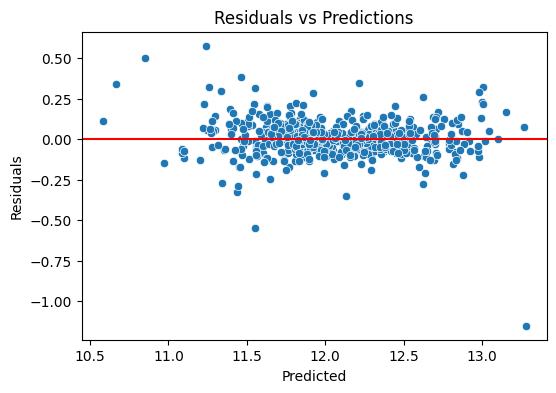

In [597]:
residuals = y_test - y_test_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red')
plt.title("Residuals vs Predictions")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()


# Inference of the Linear Regression 
1. Linear regression model explains ~93% of the variance in house prices → excellent for tabular regression
2. Train and Test scores are almost identical → No overfitting
3. RMSE is small in log-space, meaning prediction errors are proportionally small in actual prices
4. Linear Regression shows high performance and geenralization

# Residuals vs Predictions Plot
- Residuals are centered around zero
- No visible curve → model is capturing non-linearity well
- Slightly wider spread at higher predictions (normal in housing data)
- One or two extreme points → expected, not alarming
- No systematic bais
- Residual behaviour is healthy

Built an end-to-end regression pipeline with robust EDA, feature engineering, skewness handling, and model diagnostics, achieving ~93% R² with strong generalization.